In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np

**Due to the way merging data frames works, the player in the "transfer" data set will now have 2 rows after being merged with the "stats" data set (one for the 2020-21 season and another for the 2021-22 season). This "merged" data set is the "transfers_with_stats.csv" file. Since I'm only interested in those transfers that played 75% of their teams games (enough to get a reliable BPM), I'm going to only take the names that are duplicated in the data set (this means that the player played in enough in both the pre-transfer season and post-transfer season). The players that only show up once did not meet this criteria or they transferred out of Division I, so basketball reference doesn't have their data.**

In [2]:
df = pd.read_csv(os.path.join("data", "transfers_with_stats.csv"))
#keep only the rows with duplicated names because those are the ones that show up in the stats data set in their
#season before transferring and their season after transferring
df = df[df.duplicated("Name", keep=False) == True]
df.head(8)

,Stars,Position,Name,Class,Ht,Wt,Previous School,New School,Season,School,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5,2.0,SG,Mike Adewunmi,SR,6-5,205,SIUE,Texas–Rio Grande Valley,2021-22,Texas-Rio Grande Valley,...,2.2,1.3,4.3,5.6,0.9,0.6,0.6,1.6,2.8,8.4
6,2.0,SG,Mike Adewunmi,SR,6-5,205,SIUE,Texas–Rio Grande Valley,2020-21,Southern Illinois-Edwardsville,...,3.7,0.8,5.3,6.1,1.0,0.7,0.4,2.4,3.0,13.0
7,3.7,C,Abdul Ado,RS SR,-11,255,Mississippi State,Cincinnati,2020-21,Mississippi State,...,1.9,2.6,4.2,6.8,0.7,0.6,2.1,1.5,2.3,5.9
8,3.7,C,Abdul Ado,RS SR,-11,255,Mississippi State,Cincinnati,2021-22,Cincinnati,...,1.3,1.7,2.8,4.5,0.6,1.0,1.5,0.8,2.2,2.4
12,2.0,PF,Daniel Akin,RSSR,6-9,225,UMBC,California Baptist,2021-22,California Baptist,...,6.0,2.0,6.1,8.1,1.5,0.7,1.0,2.4,3.2,10.8
13,2.0,PF,Daniel Akin,RSSR,6-9,225,UMBC,California Baptist,2020-21,Maryland-Baltimore County,...,4.6,1.9,4.5,6.4,0.7,0.4,0.8,1.2,2.6,7.9
14,4.0,PG,James Akinjo,SR,6-1,190,Arizona,Baylor,2021-22,Baylor,...,3.6,0.4,2.4,2.8,5.8,2.0,0.0,3.0,1.6,13.5
15,4.0,PG,James Akinjo,SR,6-1,190,Arizona,Baylor,2020-21,Arizona,...,4.9,0.3,2.0,2.3,5.4,1.4,0.0,2.3,2.0,15.6


In [3]:
# 2023 data
df2 = pd.read_csv(os.path.join("data", "transfers_with_stats_2023.csv"))
#keep only the rows with duplicated names because those are the ones that show up in the stats data set in their
#season before transferring and their season after transferring
df2 = df2[df2.duplicated("Name", keep=False) == True]
df2.head(8)

,Stars,Position,Name,Class,Ht,Wt,Previous School,New School,Season,School,...,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1,2.0,PF,Riley Abercrombie,RS JR,6-9,220,Rice,Northern Colorado,2022-23,Northern Colorado,...,1.0,0.9,3.2,4.1,0.8,0.3,0.3,0.9,1.8,7.6
2,2.0,PF,Riley Abercrombie,RS JR,6-9,220,Rice,Northern Colorado,2021-22,Rice,...,0.4,0.2,1.2,1.4,0.5,0.1,0.1,0.5,0.8,3.2
4,2.0,PG,Tyson Acuff,RS FR,6-4,190,Duquesne,Eastern Michigan,2022-23,Eastern Michigan,...,2.9,0.3,2.8,3.1,2.8,1.5,0.2,1.6,1.4,12.5
5,2.0,PG,Tyson Acuff,RS FR,6-4,190,Duquesne,Eastern Michigan,2021-22,Duquesne,...,0.6,0.4,2.5,2.9,0.9,0.6,0.2,0.7,1.4,5.7
6,3.0,SF,Isaiah Adams,RS FR,6-6,210,UCF,Buffalo,2022-23,Buffalo,...,1.9,0.8,4.1,4.9,1.6,0.6,0.5,2.7,2.6,10.4
7,3.0,SF,Isaiah Adams,RS FR,6-6,210,UCF,Buffalo,2021-22,Central Florida,...,1.1,0.4,1.8,2.2,1.0,0.6,0.3,1.4,1.4,4.1
12,2.0,SG,Christian Agnew,SR,6-2,182,UTEP,Southeastern Louisiana,2022-23,Southeastern Louisiana,...,3.1,0.2,1.8,2.1,0.9,0.7,0.1,1.6,2.1,8.5
13,2.0,SG,Christian Agnew,SR,6-2,182,UTEP,Southeastern Louisiana,2021-22,UTEP,...,1.5,0.5,1.6,2.1,0.9,0.5,0.1,1.1,2.2,4.6


**The first thing I'm going to do is actually find the effective transfers. I'm going to evaluate someone as an "effective transfer" by (1) finding the players that actually played consistent minutes (already know they played 75% of their team's games) and (2) were additive when they played (positive BPM players). I'm going to set the MPG cutoff at 14 minutes per game as that is ~1/3 of a game. This is obviously arbitrary, and the threshold could be increased to find something like "stars" as opposed to just effective rotation players in general (stars included). This is mostly a curiosity thing.**

In [4]:
#take the necessary columns
effective = df[["Name", "Position", "Class", "Previous School", "New School", "Season", "Conf", "MPG", "OBPM", 
                "DBPM", "BPM"]]
#only looking at the season after players transferred (post-transfer season)
effective = effective[effective.Season == "2021-22"]
#filter
effective = effective[(effective.MPG >= 14) & (effective.BPM > 0)]
#I don't have a great way of dealing with players who share the same name so I'm going to drop them
#There ar only like 6 repeat players, so it doesn't impact sample size in a major way
repeat_names = list(effective[effective.duplicated("Name") == True]["Name"])
effective = effective[~effective["Name"].isin(repeat_names)]
#do a quick check to make sure there are no left over repeated names
assert len(effective[effective.duplicated("Name", keep=False) == True]) == 0
effective = effective.sort_values(by="BPM", ascending=False)
effective.head(10)

,Name,Position,Class,Previous School,New School,Season,Conf,MPG,OBPM,DBPM,BPM
328,Tari Eason,PF,SO,Cincinnati,LSU,2021-22,SEC,24.4,9.0,5.7,14.7
663,Walker Kessler,C,SO,North Carolina,Auburn,2021-22,SEC,25.6,6.2,8.0,14.1
1213,Bryson Williams,PF,RS SR,UTEP,Texas Tech,2021-22,Big 12,25.6,6.7,2.5,9.2
751,Brady Manek,PF,SR,Oklahoma,North Carolina,2021-22,ACC,30.4,6.8,2.2,8.9
863,Taze Moore,SG,RS SR,Cal State Bakersfield,Houston,2021-22,AAC,30.1,3.8,4.8,8.6
1246,Payton Willis,SG,RS SR,College of Charleston,Minnesota,2021-22,Big Ten,36.3,6.5,1.8,8.3
1249,Mylik Wilson,PG,RS SO,Louisiana,Texas Tech,2021-22,Big 12,15.2,0.6,7.6,8.3
131,Matt Bradley,SG,SR,California,San Diego State,2021-22,MWC,31.5,5.0,3.2,8.2
25,Timmy Allen,SF,SR,Utah,Texas,2021-22,Big 12,29.0,4.5,3.3,7.8
697,Kur Kuath,SF,RS SR,Oklahoma,Marquette,2021-22,Big East,19.0,2.2,5.6,7.8


# Data Manipulation for Analysis

**The major data cleaning steps are:**
* 1) Dropping columns I won't be using
* 2) Initializing empty columns that I will fill with post transfer season BPM (target data) and post transfer season conference (so that I can create the features "level" and "move")
* 3) Create the columns "level" and "move" by categorizing the level they are transferring from ("level") and how much of a change in competition that is ("move")
* 4) Final steps including renaming columns and dropping columns that were used to create "level" and "move" since they are not needed anymore

1) These are columns that I am either not interested in or that have another stat that is similar that I will be using instead (using BPM as opposed to WS so I'll drop WS for example).

2) The column Post_BPM holds the player's BPM for their season after transferring (target data). The column Post_Conf holds the player's new conference after transferring. Post_Conf is needed for step 3.

3) I'm going to add two variables. The first will be "level" which is the level that they are transferring from. Level will be "high" for Power 6 schools, "mid" for mid-majors, and "low" for low-majors. Low majors are schools that are 1 bid leagues while mid-majors are non Power-5 schools that usually receive more than 1 bid. The second will be "move" which will either be "same" (high --> high), "up" (mid --> high), "2 up" (low --> high), "down" (high --> mid), or "2 down" (high --> low).

4) See code comments in the function under Part 4 below if you want more justification for why I dropped certian columns 

In [5]:
#the define_level funtion takes the value of the "Post_Conf" column for a player and gives the conf a competition categorization
#of "high", "mid", or "low" --- it will be called within the data_manipulation function as to do part 3
def define_level(conf):
    if conf in ["ACC", "SEC", "Pac-12", "Big 12", "Big Ten", "Big East"]:
        return("high")
    if conf in ["AAC", "WCC", "MWC", "A-10"]:
        return("mid")
    else:
        return("low")

#the data_manipulation function contains all the data pre-processing steps that I do to get the data ready to be modeled
#REMINDER: df contains only the rows with names that are duplicated (the pre transfer season and post transfer season 
#for the player) along with all their stats and information
#the parameters to be passed are a dataframe, a pre-transfer season (Ex: "2020-21"), and a post-transfer season (Ex: "2021-22")
def data_manipulation(df=df, pre_transfer = "2020-21", post_transfer="2021-22"):
    # Part 1
    #reset the index
    df = df.reset_index(drop=True)
    #drop the columns that I don't want
    df = df.drop(columns=["Ht", "Wt", "School", "MP", "PER", "eFG%", "USG%", "ORtg", "DRtg", "OWS", "DWS", 
                                        "WS", "FG", "FGA", "2P", "2PA", "3P", "3PA", "FT", "FTA", "PF"])
    
    # Part 2
    #Here I'm going to initialize two columns that are going from the post transfer season that need to be in the row 
    #for the pre transfer season so that I can use them for modeling purposes
    df["Post_BPM"] = 0.0 #This will be the target data (want to predict the post transfer BPM from the previous season)
    df["Post_Conf"] = "" #Need this to determine if a player changed levels of competition when transferring
    
    #this is a counter variable to determine how many players are dropped 
    num_errors = 0
    #loop through all the players
    for player in list(df["Name"]):
        try:
            #create a dataframe with just the 2 rows (1 for pre transfer season and 1 for post transfer season) for each player
            player_df = df[df.Name == player]
            #get their post transfer bpm (target data) and conference (to help with creating variable later)
            post_transfer_bpm = float(player_df[player_df.Season == post_transfer]["BPM"].values[0])
            post_transfer_conf = str(player_df[player_df.Season == post_transfer]["Conf"].values[0])
            #find the df index of the pre-transfer season so I can add target data (post transfer bpm) value to that row (post transfer conf too)
            index = int(player_df[player_df.Season == pre_transfer].index[0])
            #edit the row according to its index
            df.at[index, "Post_BPM"] = post_transfer_bpm
            df.at[index, "Post_Conf"] = post_transfer_conf
        #this error will be thrown if the player has no 2020-21 season (has 2 2021-22 seasons for some reason)
        #there are 10 cases of this and they will be dropped
        except IndexError:
            #add one to the counter each time there is an Index error
            num_errors += 1
            continue
    #print(num_errors) #can uncomment this if you want to see how many players are being dropped
    
    # Part 3
    #take only the pre-transfer year since the goal is to predict post-transfer success from pre-transfer data
    df = df[df.Season == pre_transfer]
    df = df.reset_index(drop=True)
    #make pre_level and post_level column for each player by using apply to apply the "define_level" function defined above
    df["pre_level"] = df["Conf"].apply(define_level)
    df["post_level"] = df["Post_Conf"].apply(define_level)
    #initialize empty column called "move" that will categorize how the level of competition changed when they transferred
    df["move"] = ""

    #loop through each player
    for i in range(len(df)):
        #grab their pre_level and post_level statuses 
        pre_level = df.iloc[i]["pre_level"]
        post_level = df.iloc[i]["post_level"]
        #if they moved to the same level give them a "same" categorization
        if pre_level == post_level:
            df.at[i, "move"] = "same"
        #else if they moved up 1 level give them "up"
        elif (pre_level == "mid" and post_level == "high") or (pre_level == "low" and post_level == "mid"):
            df.at[i, "move"] = "up"
        #else if they moved down 1 level give them "down"
        elif (pre_level == "high" and post_level == "mid") or (pre_level == "mid" and post_level == "low"):
            df.at[i, "move"] = "down"
        #else if they went up two levels, give them "2 up"
        elif pre_level == "low" and post_level == "high":
            df.at[i, "move"] = "2 up"
        #if non of those conditional statements has hit, then we know they had to have moved down 2 levels --> "2 down" categorization
        else:
            df.at[i, "move"] = "2 down"
            
    # Part 4
    #drop the categorical columns that I used or created that led me to getting the "move" and "level" columns
    #also dropped games since we know the player had to have played 75% of their team's games both seasons (they have enough games played)
    #as well as drop the OBPM and DBPM to just use BPM 
    df = df.drop(columns=["Season", "Conf", "Post_Conf", "post_level", "G", "OBPM", "DBPM"])
    #rename the columns appropriately
    df = df.rename(columns={"pre_level": "Level", "move": "Move"})
    
    return df

**The dataframe "transfers" contains the data 2020-21 pre transfer season (used for modeling) and 2021-22 target data (post transfer season BPM)**

**The dataframe "transfers2" contains the data 2021-22 pre transfer season. The model trained on the previous year will be applied to this data to predict the 2022-23 season post transfer BPM**

In [6]:
transfers = data_manipulation(df, "2020-21", "2021-22")
transfers.head()

,Stars,Position,Name,Class,Previous School,New School,TS%,ORB%,DRB%,TRB%,...,DRB,TRB,AST,STL,BLK,TOV,PTS,Post_BPM,Level,Move
0,2.0,SG,Mike Adewunmi,SR,SIUE,Texas–Rio Grande Valley,0.584,3.4,21.1,12.5,...,5.3,6.1,1.0,0.7,0.4,2.4,13.0,-3.2,low,same
1,3.7,C,Abdul Ado,RS SR,Mississippi State,Cincinnati,0.580,11.3,16.8,14.1,...,4.2,6.8,0.7,0.6,2.1,1.5,5.9,3.8,high,down
2,2.0,PF,Daniel Akin,RSSR,UMBC,California Baptist,0.569,9.9,21.9,16.1,...,4.5,6.4,0.7,0.4,0.8,1.2,7.9,0.3,low,same
3,4.0,PG,James Akinjo,SR,Arizona,Baylor,0.523,1.0,6.5,3.8,...,2.0,2.3,5.4,1.4,0.0,2.3,15.6,6.1,high,same
4,2.0,PG,Ayo Akinwole,SR,Omaha,Drake,0.631,1.7,11.6,6.5,...,3.1,3.6,2.9,0.9,0.0,1.7,13.0,-2.2,low,same


In [7]:
transfers2 = data_manipulation(df2, "2021-22", "2022-23")
transfers2.head()

,Stars,Position,Name,Class,Previous School,New School,TS%,ORB%,DRB%,TRB%,...,DRB,TRB,AST,STL,BLK,TOV,PTS,Post_BPM,Level,Move
0,2.0,PF,Riley Abercrombie,RS JR,Rice,Northern Colorado,0.611,2.9,14.6,9.0,...,1.2,1.4,0.5,0.1,0.1,0.5,3.2,1.6,low,same
1,2.0,PG,Tyson Acuff,RS FR,Duquesne,Eastern Michigan,0.558,1.7,13.5,7.1,...,2.5,2.9,0.9,0.6,0.2,0.7,5.7,-0.6,mid,down
2,3.0,SF,Isaiah Adams,RS FR,UCF,Buffalo,0.437,3.1,14.1,8.5,...,1.8,2.2,1.0,0.6,0.3,1.4,4.1,-4.1,mid,down
3,2.0,SG,Christian Agnew,SR,UTEP,Southeastern Louisiana,0.510,3.8,12.1,7.9,...,1.6,2.1,0.9,0.5,0.1,1.1,4.6,-5.4,low,same
4,4.0,SF,Justin Ahrens,SR,Ohio State,Loyola Marymount,0.537,1.0,12.2,7.1,...,2.2,2.3,0.8,0.3,0.0,0.7,4.8,-0.1,high,down


**As seen in the output below over half of all transfers stay on their "level"**

In [8]:
transfers["Move"].value_counts() / len(transfers)

same      0.510101
down      0.159091
up        0.118687
2 up      0.113636
2 down    0.098485
Name: Move, dtype: float64

In [9]:
transfers["Level"].value_counts() / len(transfers)

low     0.494949
high    0.328283
mid     0.176768
Name: Level, dtype: float64

In [10]:
len(transfers)

396

**Pretty similar distributions in terms of the level they moved to in both transfer cycles. Do see an uptick in low major transfers in terms of percentage of total transfers with the corresponding downtick in high and mid.**

In [11]:
transfers2["Move"].value_counts() / len(transfers2)

same      0.562500
2 up      0.137019
up        0.122596
down      0.110577
2 down    0.067308
Name: Move, dtype: float64

In [12]:
transfers2["Level"].value_counts() / len(transfers2)

low     0.641827
high    0.228365
mid     0.129808
Name: Level, dtype: float64

In [13]:
len(transfers2)

416

In [14]:
transfers.corr()["BPM"]

Stars       0.343149
TS%         0.463703
ORB%        0.086496
DRB%        0.086633
TRB%        0.100626
AST%        0.146828
STL%        0.202773
BLK%        0.210882
TOV%       -0.335209
PProd       0.350300
BPM         1.000000
MPG         0.156846
ORB         0.145750
DRB         0.191729
TRB         0.194948
AST         0.171563
STL         0.227620
BLK         0.218381
TOV        -0.008179
PTS         0.265220
Post_BPM    0.580972
Name: BPM, dtype: float64

# Modeling Starts Here

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.compose import ColumnTransformer

### Pre-processing Column Transformation

**1) Since there are some categorical variables that I want to use to predict, I need to encode these variables as the regression cannot understand variables that are not numeric. Therefore, I create a column for each individual category of "move" and "level". I encode the column corresponding to an individual category with the value of 1 if the corresponding player falls under that category, and 0 if the category is not the case for the corresponding player. OneHotEncoder does that process for me, and then I add these columns to the data**

**2) Only scaling the numerical data. This scaling is important specifically with regression. The variables that I encoded with 1s and 0s do not need to be scaled. I am not scaling the target data as well since I want the model to predict a value in terms of BPM instead of standard deviations.**

**There are several categories that store player identification information that I obviously don't want to transform, so I'm just going to pass those through.**

In [16]:
#this is a list of the categorical columns that I want to be encoded via the OneHotEncoder
categorical_columns = list(transfers.columns)[-2:]
#this is a list of the numerical columns I want to standardize
#I'm not going to scale the target data as I want the predicitions to be in terms of BPM not standard deviations
numerical_columns = list(transfers.columns)[6:-3]
#list of remaining columns
remaining_columns = ["Stars", "Position", "Name", "Class", "Previous School", "New School", "Post_BPM"]

#set up the column transformer
col_transformer = ColumnTransformer(
    # Encode categorical variables and scale numerical variabes
    [("Encoder", OneHotEncoder(), categorical_columns),
     ("Scaler", StandardScaler(), numerical_columns)
    ],
    # Any other columns are ignored
    remainder="passthrough"
  )

#the line below that is commented out gets the order of the columns that the transformer uses
#list(pd.DataFrame(col_transformer.fit_transform(transfers), columns=col_transformer.get_feature_names_out()).columns)

#since the names the transformer uses are something like "Encoder__Level_high" and I just want it to be named "high"
#I'm going to take the same order of columns that the transformer uses, but I'm going to name them how I want them
transformer_order = ["high", "low", "mid", "2 down", "2 up", "down", "same", "up"] + numerical_columns + remaining_columns
#md stands for modeling data
md = pd.DataFrame(col_transformer.fit_transform(transfers), columns=transformer_order)
md_2023 = pd.DataFrame(col_transformer.fit_transform(transfers2), columns=transformer_order)
md.head()

,high,low,mid,2 down,2 up,down,same,up,TS%,ORB%,...,BLK,TOV,PTS,Stars,Position,Name,Class,Previous School,New School,Post_BPM
0,0,1,0,0,0,0,1,0,0.796915,-0.415966,...,0.0450024,1.0722,0.84318,2,SG,Mike Adewunmi,SR,SIUE,Texas–Rio Grande Valley,-3.2
1,1,0,0,0,0,1,0,0,0.736696,1.7055,...,3.65162,-0.0556988,-0.684815,3.7,C,Abdul Ado,RS SR,Mississippi State,Cincinnati,3.8
2,0,1,0,0,0,0,1,0,0.571093,1.32954,...,0.893618,-0.431666,-0.254394,2,PF,Daniel Akin,RSSR,UMBC,California Baptist,0.3
3,1,0,0,0,0,0,1,0,-0.121427,-1.06046,...,-0.803613,0.94688,1.40273,4,PG,James Akinjo,SR,Arizona,Baylor,6.1
4,0,1,0,0,0,0,1,0,1.50449,-0.872483,...,-0.803613,0.194946,0.84318,2,PG,Ayo Akinwole,SR,Omaha,Drake,-2.2


In [17]:
md_2023.head()

,high,low,mid,2 down,2 up,down,same,up,TS%,ORB%,...,BLK,TOV,PTS,Stars,Position,Name,Class,Previous School,New School,Post_BPM
0,0,1,0,0,0,0,1,0,1.34884,-0.54821,...,-0.563194,-1.34478,-1.25387,2,PF,Riley Abercrombie,RS JR,Rice,Northern Colorado,1.6
1,0,0,1,0,0,1,0,0,0.41637,-0.872729,...,-0.351551,-1.06188,-0.698376,2,PG,Tyson Acuff,RS FR,Duquesne,Eastern Michigan,-0.6
2,0,0,1,0,0,1,0,0,-1.71247,-0.494124,...,-0.139908,-0.0717444,-1.05389,3,SF,Isaiah Adams,RS FR,UCF,Buffalo,-4.1
3,0,1,0,0,0,0,1,0,-0.428127,-0.304821,...,-0.563194,-0.49609,-0.942795,2,SG,Christian Agnew,SR,UTEP,Southeastern Louisiana,-5.4
4,1,0,0,0,0,1,0,0,0.0469024,-1.06203,...,-0.774837,-1.06188,-0.898355,4,SF,Justin Ahrens,SR,Ohio State,Loyola Marymount,-0.1


In [18]:
#This cell is just to visualize my renamed order with the column order to ensure that the columns are in the same order
# print(transformer_order)
# list(pd.DataFrame(col_transformer.fit_transform(transfers), columns=col_transformer.get_feature_names_out()).columns)

**Now that I have the appropriate names in the appropriate order according to the transformer, I am going to reorder the columns the way that I want them to be, so it is more visually appealing**

In [19]:
#manually set my order of columns
my_order = list(transfers.columns[:-3]) + ["2 down", "down", "same", "up", "2 up", "low", "mid", "high"] + [transfers.columns[-3]]
#this line orders the df appropriate
md = md[my_order]
md_2023 = md_2023[my_order]
#visualize the data
md.head()

,Stars,Position,Name,Class,Previous School,New School,TS%,ORB%,DRB%,TRB%,...,PTS,2 down,down,same,up,2 up,low,mid,high,Post_BPM
0,2,SG,Mike Adewunmi,SR,SIUE,Texas–Rio Grande Valley,0.796915,-0.415966,1.48961,0.7886,...,0.84318,0,0,1,0,0,1,0,0,-3.2
1,3.7,C,Abdul Ado,RS SR,Mississippi State,Cincinnati,0.736696,1.7055,0.580955,1.20785,...,-0.684815,0,1,0,0,0,0,0,1,3.8
2,2,PF,Daniel Akin,RSSR,UMBC,California Baptist,0.571093,1.32954,1.65866,1.7319,...,-0.254394,0,0,1,0,0,1,0,0,0.3
3,4,PG,James Akinjo,SR,Arizona,Baylor,-0.121427,-1.06046,-1.59559,-1.49105,...,1.40273,0,0,1,0,0,0,0,1,6.1
4,2,PG,Ayo Akinwole,SR,Omaha,Drake,1.50449,-0.872483,-0.517881,-0.783571,...,0.84318,0,0,1,0,0,1,0,0,-2.2


In [20]:
#visualize the 2023 data
md_2023.head()

,Stars,Position,Name,Class,Previous School,New School,TS%,ORB%,DRB%,TRB%,...,PTS,2 down,down,same,up,2 up,low,mid,high,Post_BPM
0,2,PF,Riley Abercrombie,RS JR,Rice,Northern Colorado,1.34884,-0.54821,0.178391,-0.0865957,...,-1.25387,0,0,1,0,0,1,0,0,1.6
1,2,PG,Tyson Acuff,RS FR,Duquesne,Eastern Michigan,0.41637,-0.872729,-0.0456872,-0.571679,...,-0.698376,0,1,0,0,0,0,1,0,-0.6
2,3,SF,Isaiah Adams,RS FR,UCF,Buffalo,-1.71247,-0.494124,0.0765371,-0.214249,...,-1.05389,0,1,0,0,0,0,1,0,-4.1
3,2,SG,Christian Agnew,SR,UTEP,Southeastern Louisiana,-0.428127,-0.304821,-0.330877,-0.367433,...,-0.942795,0,0,1,0,0,1,0,0,-5.4
4,4,SF,Justin Ahrens,SR,Ohio State,Loyola Marymount,0.0469024,-1.06203,-0.310507,-0.571679,...,-0.898355,0,1,0,0,0,0,0,1,-0.1


### Train/Test Split

In [21]:
md.columns

Index(['Stars', 'Position', 'Name', 'Class', 'Previous School', 'New School',
       'TS%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'PProd',
       'BPM', 'MPG', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS',
       '2 down', 'down', 'same', 'up', '2 up', 'low', 'mid', 'high',
       'Post_BPM'],
      dtype='object')

In [22]:
#create a list of the features that I want to use to predict the post_transfer_BPM
prediction_columns = ["MPG", "BPM", "PProd", "low", "mid", "high", "2 down", "down", "same", "2 up", "up", "TS%"]
#prediction_columns = ['2 down', 'down', 'same', 'low', 'mid', 'high', 'TS%', 'PProd', 'BPM', 'MPG']
#create an X dataframe with the prediction columns
X = md[prediction_columns]
#create the array of target data
y = md["Post_BPM"]

**The first thing that I am going to do is evaluate a Naive model to set a baseline for further modeling. This naive model will simply predict the post transfer season BPM by using the pre transfer season BPM**

In [23]:
naive_X = X[["BPM"]]
naive_y = y
nX_train, nX_test, nY_train, nY_test = train_test_split(naive_X, naive_y, test_size = .25, random_state=42)
naive_model = LinearRegression()
naive_model.fit(nX_train, nY_train)
naive_pred = naive_model.predict(nX_test)
naive_score = naive_model.score(nX_test, nY_test)
naive_mae = mean_absolute_error(y_true=nY_test, y_pred=naive_pred)
print("The baseline target R^2 score is ", naive_score)
print("The baseline target MAE is ", naive_mae)

The baseline target R^2 score is  0.25512680241579677
The baseline target MAE is  2.3782690215686118


### I am looking to exceed and R^2 score of .255 and a MAE of 2.378

**The cell below does some exploratory analysis to see what is correlated with Post_BPM.**

In [24]:
#to get the results need to have "Level", "Move", and "Post_BPM" in prediction_columns list
#Obviously, I'm going to take out "Post_BPM" as that is the response variable, so I won't use the response variable to predict the response variable
#I'm putting Post_BPM in just to get the correlation matrix to see how level and move are correlated
#md.corr()

**A couple of interesting notes observing the correlation matrix with Level and Move encoded. The post transfer season BPM does not seem to be correlated with whether or not you move up or down, however, there is a slightly negative correlation between moving up and post transfer BPM (you move up and play better competition, so your BPM is less is a likely explanation). Additionally, the level you are at before transferring does seem to have a slight correlation with how you do post transferrring (positive in the case where you start at a power 6 school and negative when you start a low major school)**

In [25]:
#75/25 train test split leaves about 300 training rows and 100 testing rows
#Added random state so that the split occurs the same way every time (good for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=42)
X_train

,MPG,BPM,PProd,low,mid,high,2 down,down,same,2 up,up,TS%
16,0.968521,-0.325866,-0.17384,1,0,0,0,0,0,0,1,1.17328
66,1.51747,1.77998,3.43023,0,0,1,0,0,1,0,0,-0.211755
148,1.543,-0.539116,0.829947,1,0,0,0,0,1,0,0,0.932408
7,1.4281,1.30016,2.34997,0,0,1,0,0,1,0,0,0.104395
19,0.100421,0.580446,-0.833472,0,1,0,0,1,0,0,0,-0.94944
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0876546,0.0473215,-0.0591216,1,0,0,0,0,1,0,0,0.405491
106,-0.0655395,1.11357,0.524031,0,1,0,0,0,0,0,1,-0.0160432
270,1.00682,-0.752365,0.457112,1,0,0,0,0,1,0,0,-0.25692
348,-0.640017,1.72666,-0.594475,0,0,1,0,0,1,0,0,0.857134


## Models

**The metrics that I chose to use to evaluate the models were R^2 (Coefficient of Determination) and MAE (Mean Absolute Error). I picked MAE as opposed to MSE (mean squared error) or RMSE (root mean squared error) because there are a decent amount of outliers (some players drastically improve their skills from year to year which increases performance for example) and MAE puts less emphasis on outliers (they aren't squared like they are with MSE).**

In [26]:
#initialize linear regression object
lr = LinearRegression()
#fit the training data
lr.fit(X_train, y_train)
#use the training data to predict on the test data
y_pred = lr.predict(X_test)
#calculate performance metrics (R^2: coefficient of determination and MAE: mean absolute error)
r_squared = lr.score(X_test, y_test)
mae = mean_absolute_error(y_true = y_test, y_pred = y_pred)
#this prints the metrics
print("The value of R^2 is " + str(r_squared))
print("The MAE is " + str(mae))

The value of R^2 is 0.406043158811365
The MAE is 2.1237920951934353


**I wanted to compare Ridge regression to the previous linear regression output because some of my features are decently correlated to each other. Ridge regression is more robust in cases where features are highly correlated. By looking at the output though, there does not appear to be much of a difference in the scores of linear and ridge regression.**

In [27]:
#initialzie the ridge object
ridge = Ridge()
#fit on the training
ridge.fit(X_train, y_train)
#use the training data to evaluate on the test data
y_pred_r = ridge.predict(X_test)
#get metrics
r_squared_r = ridge.score(X_test, y_test)
mae_r = mean_absolute_error(y_true = y_test, y_pred = y_pred_r)
#print the metrics
print("The value of R^2 is " + str(r_squared_r))
print("The MAE is " + str(mae_r))

The value of R^2 is 0.40566185599435667
The MAE is 2.1238472839953384


**Even though I don't have a ton of data I want to try one ensemble method, so I'm going with Random Forest**

In [28]:
#initialize Random Forest object with random state for reproducibility
rf = RandomForestRegressor(random_state=42)
#fit on the training
rf.fit(X_train, y_train)
#use the trained model to predict on the test data
y_pred = rf.predict(X_test)
#get metrics
r_squared_rf = rf.score(X_test, y_test)
mae_rf = mean_absolute_error(y_true = y_test, y_pred = y_pred)
#print metrics
print("The value of R^2 is " + str(r_squared_rf))
print("The MAE is " + str(mae_rf))

The value of R^2 is 0.31251882053890767
The MAE is 2.346005747955748


In [29]:
#initialize gradient booster with random state for reproducibility
gb = GradientBoostingRegressor(random_state=42)
#fit on the training
gb.fit(X_train, y_train)
#use the trained model to predict on the test data
y_pred = gb.predict(X_test)
#get metrics
r_squared_gb = gb.score(X_test, y_test)
mae_gb = mean_absolute_error(y_true = y_test, y_pred = y_pred)
#print metrics
print("The value of R^2 is " + str(r_squared_gb))
print("The MAE is " + str(mae_gb))

The value of R^2 is 0.2936580583526863
The MAE is 2.3635515827391855


**I'm going to check out the feature importance plot below**

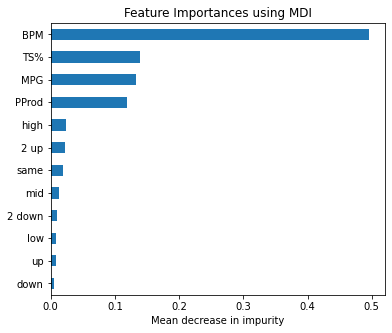

In [30]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).nsmallest(30)
#size the plot
fig, ax = plt.subplots(figsize=(6, 5))
#plot the feature importances as a horizontal bar plot
feat_importances.plot(kind="barh", ax=ax)
#set the title and axist lables
ax.set_title("Feature Importances using MDI")
ax.set_xlabel("Mean decrease in impurity")
None

In [31]:
#calculate the improvement of my model over the naive model
improvement = r_squared - naive_score
print("My model is able to explain " + str(round(improvement*100, 2)) + "% more of the variation in post transfer season BPM than the Naive model")

My model is able to explain 15.09% more of the variation in post transfer season BPM than the Naive model


### Prediction

**These next three cells get the predictions for the desired data (specifically 2022 --> 23 since that's the one we're using the 2021 --> 22 data to make a model to predict on) and then add a column to their respective dataframes with the predictions so that I can see how the model thinks a player is going to do**

In [32]:
#this just makes it so numpy arrays don't print in scientific notation (want 0.5 instead of seeing 5e-1)
np.set_printoptions(precision = 2, suppress = True)
#rf.feature_names_in_ #see the order of features so I can pass them to predict in the correct order

#these lines give the predictions for each of the 3 models
# full_preds = rf.predict(md[prediction_columns])
full_preds = lr.predict(md[prediction_columns])
#full_preds = ridge.predict(md[prediction_columns])
full_preds = full_preds.round(2)
# #visualize a couple of 
full_preds[:5]

array([-2.28,  3.13, -1.11,  5.66, -0.48])

In [33]:
#this just makes it so numpy arrays don't print in scientific notation (want 0.5 instead of seeing 5e-1)
np.set_printoptions(precision = 2, suppress = True)
#rf.feature_names_in_ #see the order of features so I can pass them to predict in the correct order

#these lines give the predictions for each of the 3 models
# full_preds2 = rf.predict(md_2023[prediction_columns])
full_preds2 = lr.predict(md_2023[prediction_columns])
#full_preds2 = ridge.predict(md_2023[prediction_columns])
full_preds2 = full_preds2.round(2)
#look at a couple of predictions to ensure that they make sense
full_preds2[:5]

array([-2.13, -1.62, -0.94, -2.41,  2.25])

In [34]:
#add the arrays as a new column to the respective dataframes
transfers["Predicted"] = full_preds
transfers2["Predicted"] = full_preds2

**Just a reminded that the data frame "transfers" has the 2021 (pre transfer) and 2022 (post transfer) seasons. I did the train/test split on this and uses the training set to create a model. I then evaluated it on the test set. This dataframe now has the added predicted column which allows us to see the predicted data ("Predicted") and compare that to how they actually did ("Post_BPM")**

**The transfers2 dataframe also has the same thing except it is for the 2022 (pre transfer) and 2023 (post transfer) seasons. I use the model I trained to predict on this new data for the new season.**

In [35]:
#only take a few columns and sort by the model's predicted BPM in descending order
transfers[["Name", "Previous School", "New School", "Post_BPM", "Predicted"]].sort_values("Predicted", ascending=False)[:10]

,Name,Previous School,New School,Post_BPM,Predicted
66,Marcus Carr,Minnesota,Texas,3.5,6.51
212,Walker Kessler,North Carolina,Auburn,14.1,6.48
206,Myreon Jones,Penn State,Florida,3.3,6.32
196,Myles Johnson,Rutgers,UCLA,6.3,6.02
179,Marreon Jackson,Toledo,Arizona State,4.4,5.83
3,James Akinjo,Arizona,Baylor,6.1,5.66
51,Terrell Brown,Pittsburgh,San Diego,8.6,5.36
7,Timmy Allen,Utah,Texas,7.8,5.36
246,Remy Martin,Arizona State,Kansas,6.9,5.29
315,Tyrece Radford,Virginia Tech,Texas A&M,6.7,5.26


In [36]:
#sort by the actual BPM this time to see how the model did
transfers[["Name", "Previous School", "New School", "Post_BPM", "Predicted"]].sort_values("Post_BPM", ascending=False)[:10]

,Name,Previous School,New School,Post_BPM,Predicted
102,Tari Eason,Cincinnati,LSU,14.7,3.11
212,Walker Kessler,North Carolina,Auburn,14.1,6.48
377,Bryson Williams,UTEP,Texas Tech,9.2,3.16
240,Brady Manek,Oklahoma,North Carolina,8.9,4.76
51,Terrell Brown,Pittsburgh,San Diego,8.6,5.36
277,Taze Moore,Cal State Bakersfield,Houston,8.6,3.75
389,Payton Willis,College of Charleston,Minnesota,8.3,2.86
390,Mylik Wilson,Louisiana,Texas Tech,8.3,4.07
38,Matt Bradley,California,San Diego State,8.2,4.63
7,Timmy Allen,Utah,Texas,7.8,5.36


## 2022-23

In [37]:
#sort by the models top 20 predicted transfers for the 2022-23 season
pred = transfers2[["Name", "Previous School", "New School", "Post_BPM", "Predicted"]].sort_values("Predicted", ascending=False)
pred = pred.reset_index(drop=True)
pred[:20]

,Name,Previous School,New School,Post_BPM,Predicted
0,Nijel Pack,Kansas State,Miami,1.5,7.45
1,Pete Nance,Northwestern,North Carolina,4.3,6.87
2,Matthew Mayer,Baylor,Illinois,8.8,6.84
3,Johni Broome,Morehead State,Auburn,7.2,6.21
4,David Jones,DePaul,St. John's,4.6,6.11
5,K.J. Williams,Murray State,LSU,9.0,5.97
6,Andersson Garcia,Mississippi State,Texas A&M,2.9,5.76
7,Terry Roberts,Bradley,Georgia,4.8,5.73
8,Baylor Scheierman,South Dakota State,Creighton,8.9,5.72
9,Tyrese Hunter,Iowa State,Texas,1.9,5.68


**Note: The season is going on and sample sizes aren't huge, so don't put too much into the actual BPM values for the 2022-23 season until the season is concluded.**

In [38]:
#get the top 10 players by actual 2022-23 season BPM
actual = transfers2[["Name", "Previous School", "New School", "Post_BPM", "Predicted"]].sort_values("Post_BPM", ascending=False)[:10]
actual = actual.reset_index(drop=True)
actual[:10]

,Name,Previous School,New School,Post_BPM,Predicted
0,Cam Spencer,Loyola (MD),Rutgers,13.0,5.17
1,Jake Stephens,VMI,Chattanooga,11.3,2.89
2,D'Moi Hodge,Cleveland State,Missouri,10.0,4.71
3,Ryan Young,Northwestern,Duke,9.6,3.91
4,Osun Osunniyi,St. Bonaventure,Iowa State,9.3,4.68
5,Hason Ward,VCU,Iowa State,9.0,3.34
6,K.J. Williams,Murray State,LSU,9.0,5.97
7,Baylor Scheierman,South Dakota State,Creighton,8.9,5.72
8,Matthew Mayer,Baylor,Illinois,8.8,6.84
9,Mark Sears,Ohio,Alabama,8.6,5.35


In [39]:
#The goal of this project is to predict "positive impact transfers". So this function takes a BPM value passed as 
#the "target" parameter and then returns an accuracy score. The accuracy score is the number of transfers my model 
#predicted to be at the "target" threshold or above and actually were divided by the total of predicted positive transfers
#the pos player argument can be toggled on and off between true or false depending on if you want a true accuracy score
#or just to determine if a predicted positive player did not turn out to be a negative impact player
def predicted_positive_accuracy(target_BPM, pos_player=True):
    #take the number of players the model predicted to be positive
    predicted_pos = len(pred[pred.Predicted >= target_BPM])
    
    if pos_player == True:
        #get the number of players where my model predicted them to be at or above the target and ended up being
        #positive impact players
        hits = len(pred[(pred.Predicted >= target_BPM) & (pred.Post_BPM >= 0)]) 
    else:
        #get the number of players where my model predicted them to be at or above the target and they actually were
        hits = len(pred[(pred.Predicted >= target_BPM) & (pred.Post_BPM >= target_BPM)]) 
    #return an accuracy score
    return(hits / predicted_pos)

print(round(predicted_positive_accuracy(2), 2))
print(round(predicted_positive_accuracy(2, pos_player=False), 2))

0.87
0.69


**The 87% means that 87% of the players my model predicted to be positive impact transfers (greater than or equal to a BPM of 2) ended up being positive players (even if they didn't reach the target BPM my model predicted them to). In other words 87% of the player my model predicted to hit or exceed 2 BPM ended up NOT being a negative impact player.**

**In terms of a true accuracy score, 69% of the players my model predicted to have a BPM greater than or equal to 2 actually did hit or exceed that target BPM**

**According to the creater of BPM, a BPM value of 2 or above (2 points above average or above) is categorized as a "good starter". Since my goal is to find effective transfers, I used a BPM value of 2 for the target measure for the accuracy scores above**

**More info here: https://www.basketball-reference.com/about/bpm2.html**